<a href="https://colab.research.google.com/github/anggithaycs/KMeans-no-libs/blob/master/KMeans_from_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

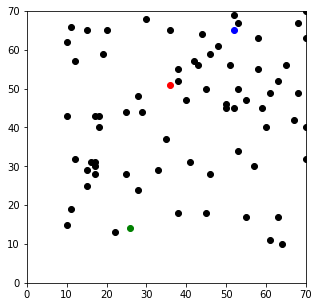

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('datakmeans.csv', delimiter=';')

a = data.iloc[:, 0] #matrix baru, pake semua baris, tapi kecuali kolom terakhir
b = data.iloc[:, 1] #matrix baru, pake semua baris, tapi kolom kelas doang

c = {'x':a, 'y':b}

df = pd.DataFrame(c)

np.random.seed(200)
k = 3

centroids = {
    i+1: [np.random.randint(10,70), np.random.randint(10,70)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closet color
0  28  48         8.544004        34.058773        29.410882       1     r
1  41  31        20.615528        22.671568        35.735137       1     r
2  55  17        38.948684        29.154759        48.093659       2     g
3  17  43        20.615528        30.364453        41.340053       1     r
4  63  17        43.416587        37.121422        49.244289       2     g


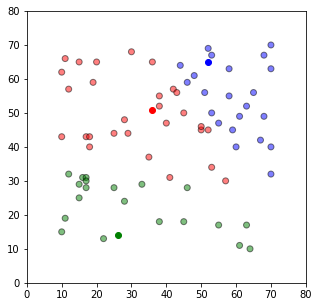

In [4]:

#Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closet'] = df.loc[:, centroid_distance_cols].idxmin(axis = 1)
    df['closet'] = df['closet'].map(lambda x : int(x.lstrip('distance_from_')))
    df['color'] = df['closet'].map(lambda x : colmap[x])
    return df

df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

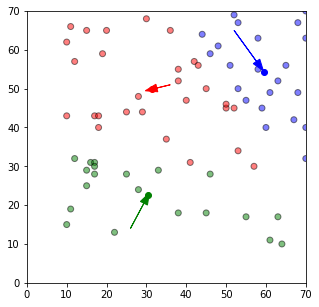

In [5]:
#Update Stage
import copy

old_centroids = copy.deepcopy(centroids)
def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closet'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closet'] == i]['y'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,70)
plt.ylim(0,70)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length=3, fc = colmap[i], ec= colmap[i])

plt.show()

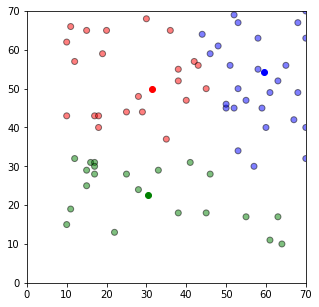

In [6]:
#Ulang assignment
df = assignment(df,centroids)

#Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()

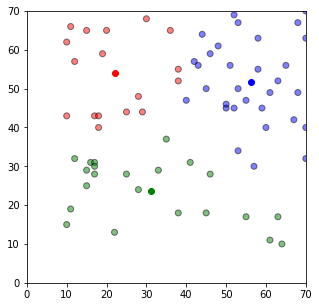

In [7]:
while True:
  closest_centroids = df['closet'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closet']):
    break


#Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,70)
plt.ylim(0,70)
plt.show()